In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Research/SlicedSearch.jl/experiments`


In [2]:
using CSV, DataFrames, AlgebraOfGraphics, CairoMakie

In [3]:
using Printf, LaTeXStrings, Latexify

In [9]:
D = CSV.read("laion-300k-queries-10k-k=16.csv", DataFrame; missingstring="XXXX")
exrow = D[D.name .== "exhaustive", :]
@info D[D.splitarg .< 2, :]
D = D[D.splitarg .>= 2, :]
D.slicetype = [s == "" ? "" : "slice $s" for s in D.slicetype]
D.splittype = [s == "" ? "" : "split $s" for s in D.splittype]
first(D, 3)

┌ Info: 21×7 DataFrame
│  Row │ name              slicetype  slicearg  splittype  splitarg  recall      searchtime
│      │ String31          String3    Float64   String3    Float64   Float64     Float64
│ ─────┼────────────────────────────────────────────────────────────────────────────────────
│    1 │ exhaustive                        0.0                  0.0  1.0            51.4627
│    2 │ SlicedEvaluation  F               4.0  F               1.2  0.9994        139.141
│    3 │ SlicedEvaluation  F               4.0  F               1.5  0.992894       79.2739
│    4 │ SlicedEvaluation  F               6.0  F               1.2  0.0479938     150.846
│    5 │ SlicedEvaluation  F               6.0  F               1.5  0.998469       81.0392
│    6 │ SlicedEvaluation  F               8.0  F               1.2  0.00983125    121.932
│    7 │ SlicedEvaluation  F               8.0  F               1.5  0.999537       69.2995
│    8 │ SlicedEvaluation  F              10.0  F             

Row,name,slicetype,slicearg,splittype,splitarg,recall,searchtime
,String31,String,Float64,String,Float64,Float64,Float64
1,SlicedEvaluation,slice F,4.0,split F,2.0,0.699456,48.1967
2,SlicedEvaluation,slice F,4.0,split F,3.0,0.373738,38.4955
3,SlicedEvaluation,slice F,4.0,split F,4.0,0.356481,33.5222


In [5]:
axis = (width = 400, height = 400)

(width = 400, height = 400)

In [6]:
#=
D.kind = ["$a$b" for (a, b) in zip(D.slicetype, D.splittype)]
S = D[D.kind .!= "", :]
layers = linear() + mapping(marker=:splitarg)
R = data(S) * mapping(:recall, :searchtime, color=:kind => "sl/sp") # * layers
draw(R + E; axis = axis)=#

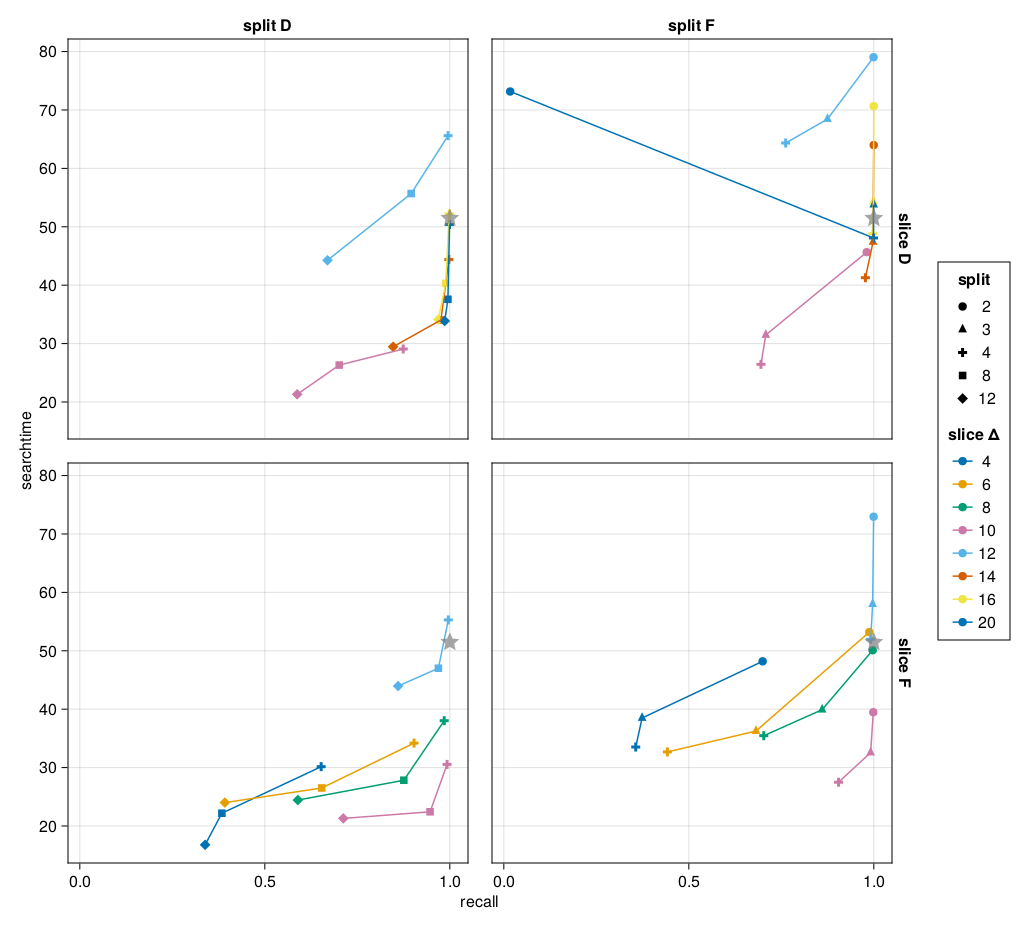

In [7]:
axis = (width = 400, height = 400)
sort!(D, :recall)
D.slicearg0 = [(@sprintf "%2i" s) for s in D.slicearg]
D.splitarg0 = [(@sprintf "%2i" s) for s in D.splitarg]
S = D[D.name .!= "exhaustive", :]
#layers = linear() + mapping() + visual(Lines) + visual(Scatter) * mapping(marker=:slicearg0)
layers = visual(Scatter, color=(:auto, 0.5)) * mapping(marker=:splitarg0 => "split") +
            visual(Lines, color=(:auto, 0.5))
R = data(S) * layers *
    mapping(:recall, :searchtime, row=:slicetype, col=:splittype, color=:slicearg0 => "slice Δ")
E = data(exrow) * 
        visual(Scatter, marker=:star5, markersize=22, color=(:gray, 0.7)) *
        mapping(:recall, :searchtime)
fig = draw(R+E; axis = axis)
save("fig-performance-10k.png", fig) #px_per_unit = 3)
fig

In [8]:
T = CSV.read("laion-300k-allknn-k=16.csv", DataFrame; stringtype=String)
T.slicearg = Int.(T.slicearg)
T.splitarg = Int.(T.splitarg)
T.recall = round.(T.recall, digits=4)
T.searchtime = round.(T.searchtime, digits=1)

println(latexify(T; env=:table)) # fmt = "%.4f"))

\begin{tabular}{ccccccc}
$name$ & $slicetype$ & $slicearg$ & $splittype$ & $splitarg$ & $recall$ & $searchtime$\\
$exhaustive$ & $\textrm{NA}$ & $0$ & $\textrm{NA}$ & $0$ & $1.0$ & $1431.0$\\
$SlicedEvaluation$ & $F$ & $8$ & $F$ & $3$ & $0.8692$ & $1333.1$\\
$SlicedEvaluation$ & $F$ & $8$ & $D$ & $12$ & $0.6182$ & $749.4$\\
$SlicedEvaluation$ & $D$ & $16$ & $F$ & $3$ & $0.9992$ & $1699.5$\\
$SlicedEvaluation$ & $D$ & $16$ & $D$ & $12$ & $0.9728$ & $1074.4$\\
\end{tabular}

